# 量子コンピュータ銘柄

In [1]:
import datetime
import re

import matplotlib.font_manager as fm
from matplotlib import dates as mdates
import matplotlib.pyplot as plt
import mplfinance as mpf
import numpy as np
import pandas as pd
import yfinance as yf

In [2]:
name_source = "量子コンピュータ銘柄.xlsx"
df_code = pd.read_excel(name_source)
df_code

,コード,銘柄名,市場
0,2693,ＹＫＴ,東Ｓ
1,3655,ブレインＰ,東Ｐ
2,3687,Ｆスターズ,東Ｐ
3,3741,セック,東Ｐ
4,3858,ユビＡＩ,東Ｓ
5,3915,テラスカイ,東Ｐ
6,4069,ブルーミーム,東Ｇ
7,4188,三菱ケミＧ,東Ｐ
8,4736,日本ラッド,東Ｓ
9,4847,インテリＷ,東Ｐ


In [3]:
df_result = pd.DataFrame()
for code in df_code["コード"]:
    print(code)
    symbol = f"{code}.T"
    ticker = yf.Ticker(symbol)
    ser = ticker.history(period="1y")["Close"]
    df_result[code] = ser / ser.iloc[0]
df_result

2693
3655
3687
3741
3858
3915
4069
4188
4736
4847
5582
6501
6503
6521
6597
6613
6701
6702
6703
6728
6807
6838
6864
6902
7203
7713
8015
8739
9432


,2693,3655,3687,3741,3858,3915,4069,4188,4736,4847,...,6728,6807,6838,6864,6902,7203,7713,8015,8739,9432
Date,,,,,,,,,,,,,,,,,,,,,
2024-06-04 00:00:00+09:00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2024-06-05 00:00:00+09:00,0.996198,0.977169,0.972528,0.963387,0.981781,0.990635,1.000000,0.983245,0.977668,0.976744,...,0.973921,1.000000,0.991632,0.983260,0.968628,0.975743,0.988600,0.967666,0.981535,0.988975
2024-06-06 00:00:00+09:00,1.007605,0.970776,0.979121,0.961098,0.963563,0.970343,0.983885,0.975929,0.950372,0.964651,...,1.005396,0.996349,0.986053,0.975330,0.973726,0.992420,0.990500,0.967028,0.973456,0.981193
2024-06-07 00:00:00+09:00,1.000000,0.985388,0.987363,0.975973,0.957490,0.983871,0.988974,0.975811,0.964020,0.961861,...,0.999550,0.985801,0.987448,0.994714,0.970196,0.976046,0.987967,0.975537,0.957300,0.972763
2024-06-10 00:00:00+09:00,0.996198,0.982648,1.015934,0.991991,0.975709,0.998959,1.017812,0.987728,0.988834,0.979535,...,1.005396,0.983773,0.991632,0.995595,0.970588,0.992116,0.986700,0.991278,0.990767,0.980545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-29 00:00:00+09:00,0.915503,1.162065,1.184791,1.194537,0.819838,1.504162,0.989822,0.940257,0.975154,1.058392,...,0.460432,1.043329,1.050336,1.269736,0.801591,0.856627,0.886151,1.013236,0.906414,1.046848
2025-05-30 00:00:00+09:00,0.938779,1.204388,1.212344,1.213238,0.821862,1.516129,0.990670,0.943932,0.980181,1.075524,...,0.452788,1.041670,1.037732,1.255286,0.793300,0.867435,0.889414,1.018544,0.912433,1.077065
2025-06-02 00:00:00+09:00,0.923262,1.188747,1.189751,1.224926,0.819838,1.476067,1.001696,0.920291,1.017880,1.057440,...,0.443255,1.032958,1.030729,1.221872,0.782583,0.843000,0.884193,1.013236,0.911229,1.054234


### 日付文字列

In [4]:
dt_start = df_result.index[0]
date_str = f"{dt_start.year:04}-{dt_start.month:02}-{dt_start.day:02}"
row_last = len(df_result) - 1
dt_end = df_result.index[row_last]
date_latest_str = f"{dt_end.year:04}{dt_end.month:02}{dt_end.day:02}"
date_latest_str

'20250604'

In [9]:
df_top = df_result.iloc[row_last].sort_values(ascending=False)
n = 4
df_top.head(n)

6701    1.632813
6703    1.453941
6702    1.430793
3915    1.417794
Name: 2025-06-04 00:00:00+09:00, dtype: float64

In [10]:
list_top = list(df_top.index)
list_top

[6701,
 6703,
 6702,
 3915,
 3741,
 6501,
 6864,
 3655,
 3687,
 6597,
 6503,
 4736,
 9432,
 4847,
 6838,
 6807,
 8015,
 4069,
 2693,
 4188,
 8739,
 7713,
 7203,
 3858,
 6902,
 5582,
 6521,
 6613,
 6728]

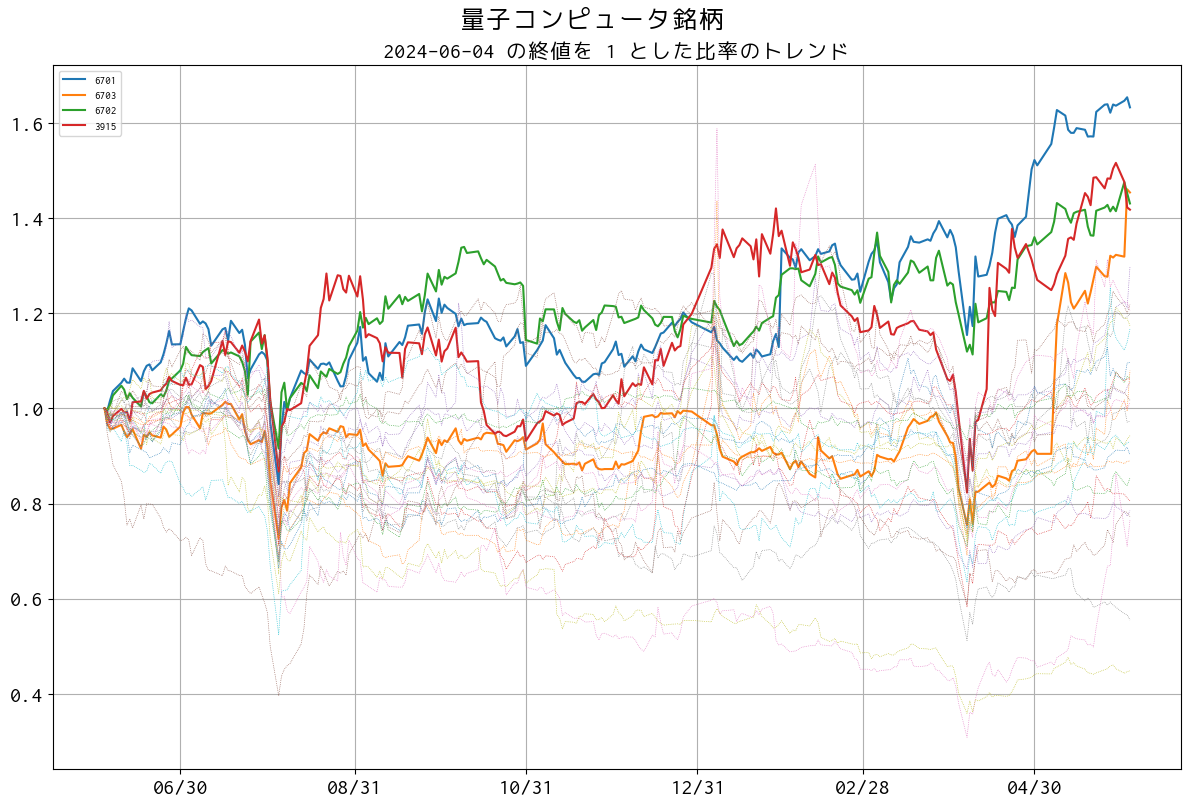

In [11]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams["font.family"] = font_prop.get_name()
plt.rcParams["font.size"] = 16

fig, ax = plt.subplots(figsize=(12, 8))
plt.subplots_adjust(top=0.91, left=0.05, bottom=0.03, right=0.99)

for i, colname in enumerate(list_top):
    if i < n:
        width = 1.5
        lstyle = "solid"
        ax.plot(df_result[colname], lw=width, ls=lstyle, label=colname)
    else:
        width = 1
        lstyle = "dotted"
        ax.plot(df_result[colname], lw=width, ls=lstyle)

ax.xaxis.set_major_formatter(mdates.DateFormatter("%m/%d"))
fig.suptitle("量子コンピュータ銘柄")
ax.set_title(f"{date_str} の終値を 1 とした比率のトレンド", fontsize=16)
ax.grid()
ax.legend(loc='upper left', fontsize=8)
#plt.tight_layout()

plt.savefig(f"screenshots/{date_latest_str}_report_quantum_computer.png")
plt.show()

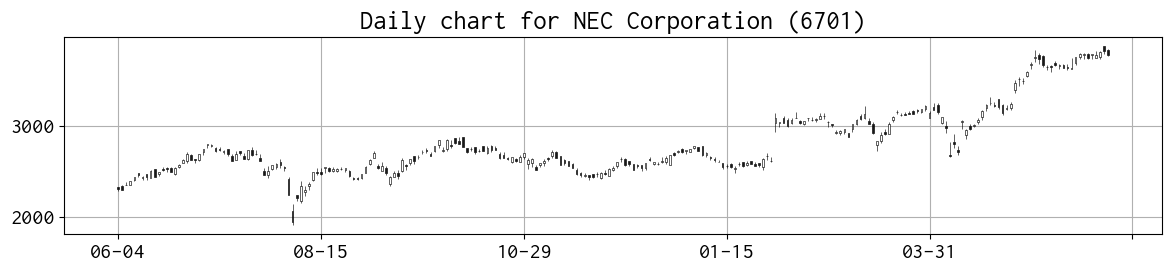

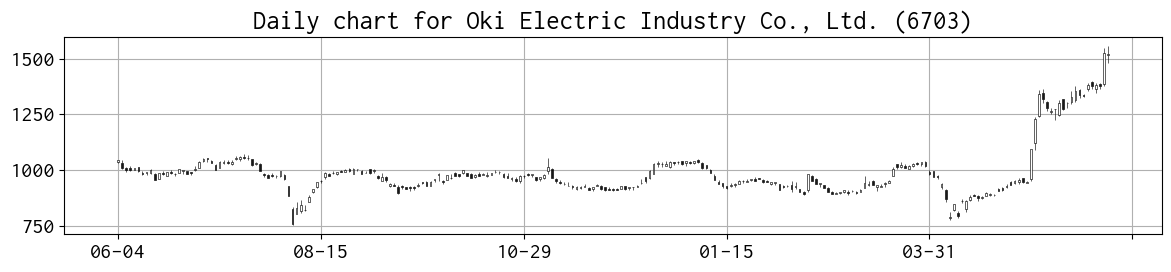

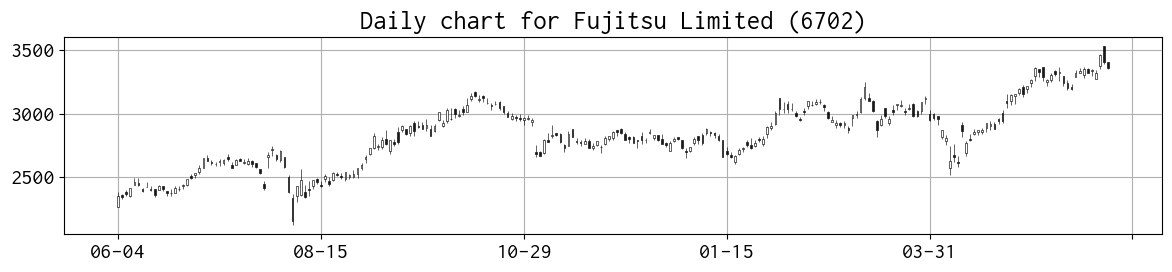

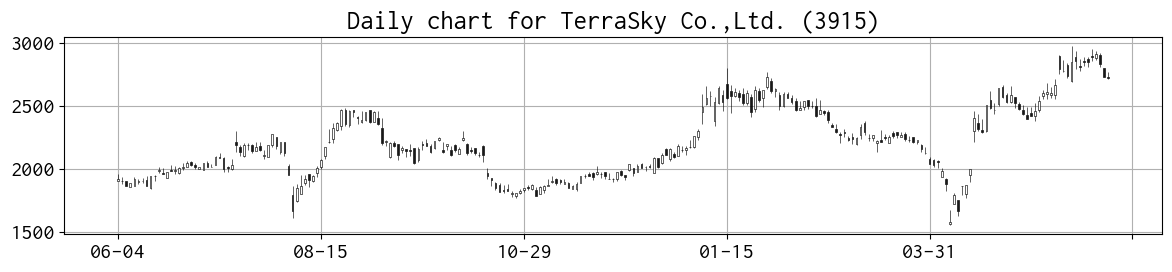

In [12]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams["font.family"] = font_prop.get_name()
plt.rcParams["font.size"] = 16

for code in list_top[0:n]:
    symbol = f"{code}.T"
    ticker = yf.Ticker(symbol)
    df = ticker.history(period="1y")
    fig, ax = plt.subplots(figsize=(12, 3))
    mpf.plot(
        df,
        type='candle',
        style='default',
        volume=False,
        datetime_format='%m-%d',
        xrotation=0,
        ax=ax
    )
    ax.set_ylabel(None)
    ax.grid()
    ax.set_title(f"Daily chart for {ticker.info['longName']} ({code})")
    plt.tight_layout()
    plt.savefig(f"screenshots/{date_latest_str}_daily_chart_{code}.png")
    plt.show()